In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
import time


In [42]:
testing_accuracy=[]

<h2>Extract MNIST data</h2>
<p style="font-size:20px">You can change the option of one_hot encoding.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
num_train = mnist.train.num_examples #55,000
num_validation = mnist.validation.num_examples #5000
num_test = mnist.test.num_examples #10,000

<h2>Define hyperparameters</h2>

In [502]:
#learning rate
lr = 0.01
#number of traning steps
num_steps =1000
#number of batch_size
batch_size = 256

#network parameters
hidden_layers=2
n_hidden_1 = 512
n_hidden_2 = 512
#n_hidden_3=512
num_input = 784
num_classes = 10

In [503]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "MNIST_logs"
logdir = "{}/run-{}-{}-lr-{}-layers-{}-epochs-{}-batchsize/".format(root_logdir,now,lr, hidden_layers, num_steps,batch_size)


<h2>Define placeholder and Variables</h2>

In [504]:
tf.reset_default_graph()

In [505]:
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
   # 'W3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]),name='W3'),
    #'W4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]),name='W4'),

    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    #'b3': tf.Variable(tf.zeros(shape=[n_hidden_3]),name='b3'),
#'b4': tf.Variable(tf.zeros(shape=[n_hidden_4]),name='b4'),

    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}


<h2>Define neural network</h2>

In [506]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    layer_2_out = tf.nn.relu(tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2']))
    #layer_3_out = tf.nn.relu(tf.add(tf.matmul(layer_2_out,weights['W3']),biases['b3']))
    #layer_4_out = tf.nn.relu(tf.add(tf.matmul(layer_3_out,weights['W4']),biases['b4']))

    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [507]:
#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()


loss_summary=tf.summary.scalar('loss',loss)
accuracy_summary=tf.summary.scalar('accuracy',accuracy)
file_writer=tf.summary.FileWriter(logdir,tf.get_default_graph())

<h2>Execute training</h2>

In [508]:

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_steps):
        #fetch batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        #run optimization
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if i % 100 ==0:
            summary = sess.run(accuracy_summary,feed_dict={X:batch_x,Y:batch_y})
            file_writer.add_summary(summary,i)
            summary2 = sess.run(loss_summary,feed_dict={X:batch_x,Y:batch_y})
            file_writer.add_summary(summary2,i)
            acc = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    print("Training finished!")
    tes=sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
    print("Testing Accuracy:",tes)
    testing_accuracy.append(tes)
file_writer.close()

step 0, Accuracy= 0.219
step 100, Accuracy= 0.961
step 200, Accuracy= 0.938
step 300, Accuracy= 0.953
step 400, Accuracy= 0.965
step 500, Accuracy= 0.961
step 600, Accuracy= 0.988
step 700, Accuracy= 0.973
step 800, Accuracy= 0.988
step 900, Accuracy= 0.980
Training finished!
Testing Accuracy: 0.9602


<h2>Your results</h2>

In [511]:
import matplotlib.pyplot as plt


In [515]:
import numpy as np
test_array=np.array(testing_accuracy,dtype=float)


Text(0.5,1,'Model Accuracy on Test Dataset')

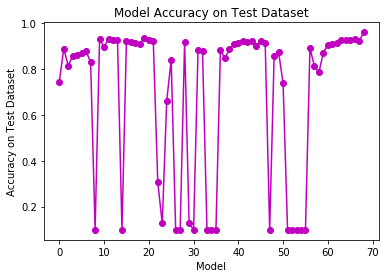

In [525]:
plt.plot(test_array, '-o', color='m')
plt.xlabel("Model")
plt.ylabel("Accuracy on Test Dataset")
plt.title('Model Accuracy on Test Dataset')

I included a plot on the different accuracies on the test dataset for all 69 models that I tried above. 

In [522]:
import pandas as pd
mydata=pd.read_csv("tableNN.csv", sep=",",header=0)

In [523]:
mydata

,learning Rate,Num_steps,Batch Size,Hidden Layers,Hidden Layer 1 Neurons,Hidden Layer 2 Neurons,Hidden Layer 3 Neurons,Activation Function,Training Accuracy,Test Accuracy
0,0.100,500,128,2,300,200,0,Sigmoid,79.70%,74.47%
1,0.100,5000,128,2,300,200,0,Sigmoid,91.40%,88.84%
2,0.100,1000,128,2,300,300,0,Sigmoid,80.50%,81.44%
3,0.100,2000,128,2,300,300,0,Sigmoid,89.80%,85.70%
4,0.100,2000,128,2,400,400,0,Sigmoid,93.00%,86.07%
5,0.100,2000,128,2,500,500,0,Sigmoid,93.00%,86.97%
6,0.100,2000,128,2,1000,1000,0,Sigmoid,94.50%,87.72%
7,0.100,2000,128,2,400,100,0,Sigmoid,82.00%,82.84%
8,0.100,2000,128,2,400,400,0,RELU,8.60%,9.80%
9,0.010,2000,128,2,400,400,0,RELU,98.40%,93.08%


I actually tested out 69 different models. Obviously, I only recorded the results for 17 of them shown above which I felt was a sufficient amount to record on. I also created a tensorboard that has the different parameters of all of the 69 models.

My final model results were with the following parameters:
Learning Rate: 0.01
Epochs: 1000
Batch Size: 256
Number of Hidden Nodes: 2
Hidden Layer 1 Neurons: 512
Hidden Layer 2 Neurons: 512
Activation Function: RELU
Optimizer: Adam
Accuracy on Training: 98%
Accuracy on Test:96.02%

I felt like the learning rate was a very important feature. Depending on its value it either made it to where I got close to 96% accuracy or it completely failed and got like 9% accuracy. This makes sense. If you have too big of a learning rate then you are going to "jump" around the local minimum, but never arrive to it. If the learning rate is too small then it will take forever to get to the local minimum and we might end up with really low accuracy because we haven't done sufficent number of steps. Number of steps seemed to be important to a point. If I didn't do enough training then it caused some problems, but if I did "too many" training it didn't seem to be detramental nor beneficial. 

Activation function didn't seem to matter too much as long as you had a learning rate that worked with the activation function chosen. For example, in model 8 and 9 from above the only difference between the models is the learning rate which made all the difference in the final accuracy. Batch size didn't seem to be too important either. In models 11-13 I tried out different batch sizes while leaving the rest of the other parameters the same.It still produced test accuracy scores that were pretty similiar.  Maybe if I made more drastic of a change with the batch size it would have had more of an impact. I tried up to 4 hidden layers. It didn't seem to have a huge impact in this case. I got similiar results with all hidden layers, so I decided simplicity is better in this case and ended with only 2 hidden layers. This probably didn't make too big of a difference because of the dataset itself. If we had more "complex" data it could require more hidden layers. I tried out two different optimizers. Adam and normal Gradient Descent. I didn't record them in my chart so I can't really say what their impact was in this case.